In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from Ising import Lattice
from spec_heat import C

In [4]:
def M_exp(T, T_c, a):
    return a * (np.abs(T_c - T) ** (1/8)) * (T < T_c)

def N_scaling(N, T_inf, nu, a):
    return T_inf + a * N ** nu

In [67]:
K = 50
n = 1000
N_steps = 6
T_l, T_h = 2.15, 2.4
T_steps = 25
Ns = np.concatenate((np.round(np.geomspace(4, 35, N_steps)) * 2, [90, 150]))
Ts = np.concatenate((np.linspace(1, T_l-0.02, 10), np.linspace(T_l, T_h, T_steps), np.linspace(T_h+0.02, 3.5, 10)))

stats_N, errs_N = [], []
for N in Ns[-1:]:
    print(f'{N = }')
    l = Lattice(int(N), d=2, K=K)
    stats, errs = l.crit_data(Ts, n=n, t0=200)
    stats_N.append(stats)
    errs_N.append(errs)


#np.savez('data/finite_size3.npz', stats_N=stats_N, errs_N=errs_N)

N = 150.0


In [68]:
stats_N = np.load('data/finite_size3.npz')['stats_N']
errs_N = np.load('data/finite_size3.npz')['errs_N']

In [85]:
K = 50
n = 1000
N_steps = 6
T_l, T_h = 2.15, 2.4
T_steps = 25
Ns = np.concatenate((np.round(np.geomspace(4, 35, N_steps)) * 2, [90, 150]))
Ts = np.concatenate((np.linspace(1, T_l-0.02, 10), np.linspace(T_l, T_h, T_steps), np.linspace(T_h+0.02, 3.5, 10)))

stats_N = np.load('data/finite_size3.npz')['stats_N']
errs_N = np.load('data/finite_size3.npz')['errs_N']

2.451511580125409
2.409082560562733
2.3362464337738413
2.313880864121215
2.299888014673666
2.29660305599059
2.2867305614506397
2.278970458182181
T_inf = 2.269115698108076 +/- 0.010480358232495728
nu = 1.0026860263047512 +/- 0.16836665870288794
a = 1.4940270406858471 +/- 0.48396713785071077


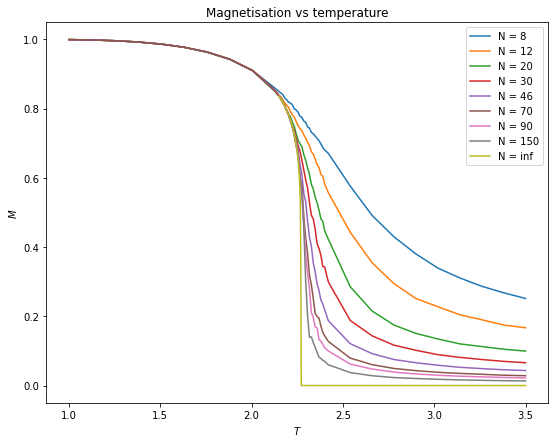

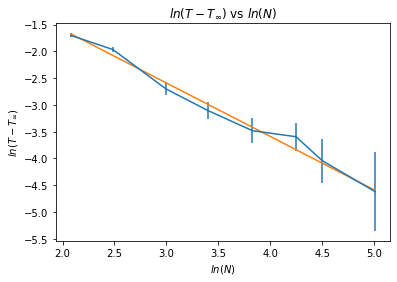

In [107]:
Ms_N = stats_N[:, 0, :]
Ms_err_N = errs_N[:, 0, :]
s1 = slice(0, None)
s2 = slice(0, None)
s3 = slice(10, None)
slices = [s1 for _ in range(3)] + [s2 for _ in range(3)] + [s3 for _ in range(2)]
fig, ax = plt.subplots()
bound = ([2.15, 0.3], [2.5, 2])

Ts_c = []
T_c_errs = []
for Ms, M_errs, s in zip(Ms_N, Ms_err_N, slices):
    Ms = Ms[s]
    M_errs = M_errs[s]
    T_range = Ts[s]
    [T_c, a], fit_err = curve_fit(M_exp, T_range, Ms, bounds=bound)
    Ts_c.append(T_c)
    T_c_err = np.sqrt(fit_err[0,0])
    T_c_errs.append(T_c_err)
    print(T_c)
    ax.plot(T_range, Ms)
Ts_c = np.array(Ts_c)
T_c_errs = np.array(T_c_err)
bound_scal = ([2.2, -3, 0], [2.4, 0, 3])
[T_inf, alpha, a], errs = curve_fit(N_scaling, Ns, Ts_c, bounds=bound_scal)

print("T_inf = " + str(T_inf) + " +/- " + str(np.sqrt(errs[0,0])))
print("nu = " + str(-1/alpha) + " +/- " + str(np.sqrt(errs[1,1])/alpha**2))
print("a = " + str(a) + " +/- " + str(np.sqrt(errs[2,2])))

T_M = np.linspace(T_l, 3.5, 500)
T_crit = 2.26918
M_theo = np.abs(1 - np.sinh(2 * T_M**(-1))**(-4))**(1/8) * (T_M < T_crit)

fig2, ax2 = plt.subplots()
N_log = np.log(Ns)
Ts_c = np.array(Ts_c)
ax2.errorbar(N_log, np.log(Ts_c-T_inf), T_c_err/(Ts_c-T_inf))
ax2.plot(N_log, np.log(N_scaling(Ns, T_inf, alpha, a)-T_inf))
ax2.set_title("$ln(T-T_{\infty})$ vs $ln(N)$")
ax2.set_xlabel("$ln(N)$")
ax2.set_ylabel("$ln(T-T_{\infty})$")


ax.plot(T_M, M_theo)
ax.set_title("Magnetisation vs temperature")
ax.set_xlabel("$T$")
ax.set_ylabel("$M$")

ax.legend(["N = " + str(int(N)) for N in Ns] + ["N = inf"])
fig.set_size_inches(9, 7)
fig.savefig(r"pics/M_N.png", format="png", dpi=1200, bbox_inches='tight')

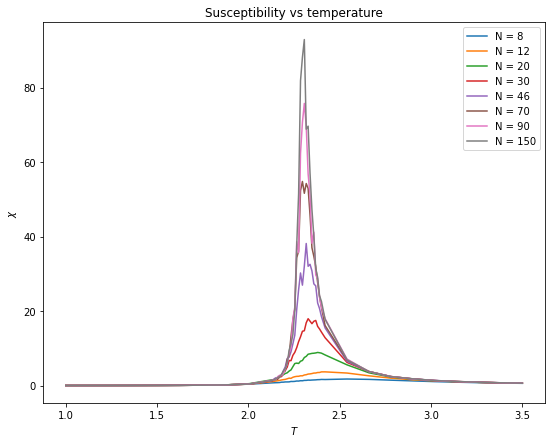

In [106]:
Chis_N = stats_N[:, 1, :]
Chis_err_N = errs_N[:, 1, :]

fig, ax = plt.subplots()

for Chis in Chis_N:
    ax.plot(Ts, Chis)
ax.set_title("Susceptibility vs temperature")
ax.set_xlabel("$T$")
ax.set_ylabel("$\chi$")

ax.legend(["N = " + str(int(N)) for N in Ns] + ["N = inf"])
ax.set_yscale("linear")
fig.set_size_inches(9, 7)
fig.savefig(r"pics/Chi_N.png", format="png", dpi=1200, bbox_inches='tight')

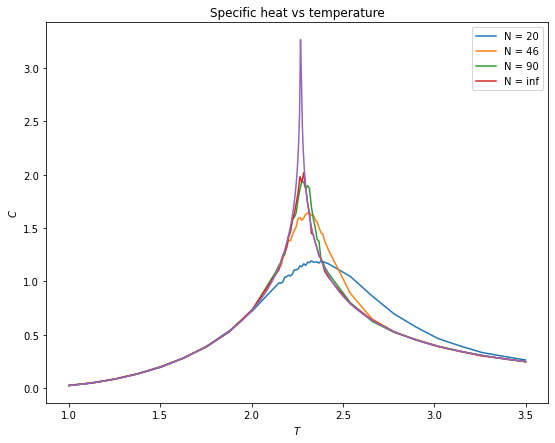

In [128]:
Cs_N = stats_N[:-1:2, 2, :]
Cs_err_N = errs_N[:-1:2, 2, :]

fig, ax = plt.subplots()

for Cs in Cs_N:
    ax.plot(Ts, Cs)

T_c = 2.26918
T_M = np.linspace(1, 3.5, 500)
C_theo = np.array([C(T) for T in T_M])
ax.plot(T_M, C_theo)
ax.set_title("Specific heat vs temperature")
ax.set_xlabel("$T$")
ax.set_ylabel("$C$")

ax.legend(["N = " + str(int(N)) for N in Ns[:-1:2]] + ["N = inf"])
ax.set_yscale("linear")
fig.set_size_inches(9, 7)
fig.savefig(r"pics/C_N.png", format="png", dpi=1200, bbox_inches='tight')

2.3240726586505827
2.308494172373542
2.3005101706849787
2.2878032267429926
2.2870550847862923
2.28674350766394
T_inf = 2.279935517931035 +/- 0.005929937754344985
nu = 0.9054760115616759 +/- 0.29204025095351105
a = 1.2165152512185122 +/- 1.185199164869553


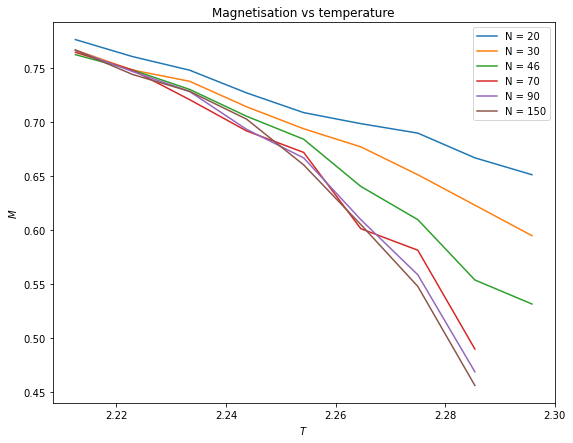

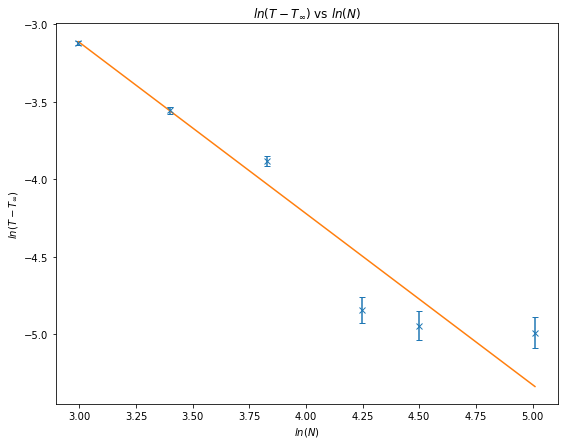

In [118]:
N_steps = 6
Ns = np.concatenate((np.round(np.geomspace(4, 35, N_steps)) * 2, [90, 150]))[2:]
Ms_N = stats_N[:, 0, :][2:]
Ms_err_N = errs_N[:, 0, :][2:]
s1 = slice(16, -20)
s2 = slice(16, -21)
s3 = slice(10, -18)
slices = [s1 for _ in range(3)] + [s2 for _ in range(3)] + [s3 for _ in range(2)]
fig, ax = plt.subplots()
bound = ([2.15, 0.3], [2.5, 2])

Ts_c = []
T_c_errs = []
for Ms, M_errs, s in zip(Ms_N, Ms_err_N, slices):
    Ms = Ms[s]
    M_errs = M_errs[s]
    T_range = Ts[s]
    [T_c, a], fit_err = curve_fit(M_exp, T_range, Ms, bounds=bound)
    Ts_c.append(T_c)
    T_c_err = np.sqrt(fit_err[0,0])
    T_c_errs.append(T_c_err)
    print(T_c)
    ax.plot(T_range, Ms)
Ts_c = np.array(Ts_c)
T_c_errs = np.array(T_c_err)
bound_scal = ([2.2, -3, 0], [2.4, 0, 3])
[T_inf, alpha, a], errs = curve_fit(N_scaling, Ns, Ts_c, bounds=bound_scal)

print("T_inf = " + str(T_inf) + " +/- " + str(np.sqrt(errs[0,0])))
print("nu = " + str(-1/alpha) + " +/- " + str(np.sqrt(errs[1,1])/alpha**2))
print("a = " + str(a) + " +/- " + str(np.sqrt(errs[2,2])))

ax.set_title("Magnetisation vs temperature")
ax.set_xlabel("$T$")
ax.set_ylabel("$M$")

ax.legend(["N = " + str(int(N)) for N in Ns] + ["N = inf"])
fig.set_size_inches(9, 7)
fig.savefig(r"pics/finite_size_M.png", format="png", dpi=1200, bbox_inches='tight')

fig2, ax2 = plt.subplots()
N_log = np.log(Ns)
Ts_c = np.array(Ts_c)
ax2.errorbar(N_log, np.log(Ts_c-T_inf), T_c_err/(Ts_c-T_inf), capsize=3, fmt='x')
ax2.plot(N_log, np.log(N_scaling(Ns, T_inf, alpha, a)-T_inf))
ax2.set_title("$ln(T-T_{\infty})$ vs $ln(N)$")
ax2.set_xlabel("$ln(N)$")
ax2.set_ylabel("$ln(T-T_{\infty})$")

fig2.set_size_inches(9, 7)
fig2.savefig(r"pics/finite_size_T.png", format="png", dpi=1200, bbox_inches='tight')